<a href="https://colab.research.google.com/github/Sazin14/repo3/blob/main/Health_Issues_wrt_sleep%20schedule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sazin14","key":"3060854c97ea06cd9f5f8dbbf7b50df4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d uom190346a/sleep-health-and-lifestyle-dataset


Dataset URL: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
License(s): CC0-1.0
  0% 0.00/2.54k [00:00<?, ?B/s]
100% 2.54k/2.54k [00:00<00:00, 6.66MB/s]


In [ ]:
!unzip sleep-health-and-lifestyle-dataset.zip


Archive:  sleep-health-and-lifestyle-dataset.zip
  inflating: Sleep_health_and_lifestyle_dataset.csv  


In [ ]:
import pandas as pd

data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')


In [ ]:
data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [ ]:
print(data.describe())

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

In [ ]:
data.shape

(374, 13)

In [ ]:
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
data["Sleep Disorder"].isnull().sum()

219

In [ ]:
data["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [ ]:
data["Sleep Disorder"].fillna("No")

,Sleep Disorder
0,No
1,No
2,No
3,Sleep Apnea
4,Sleep Apnea
...,...
369,Sleep Apnea
370,Sleep Apnea
371,Sleep Apnea
372,Sleep Apnea


In [ ]:
data["Sleep Disorder"].fillna("No", inplace=True)

<ipython-input-13-5cdf9d45a68a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Sleep Disorder"].fillna("No", inplace=True)


In [ ]:
data["Sleep Disorder"].isnull().sum()

0

In [ ]:
data["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
data["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [ ]:
data["Sleep Disorder"].head()

,Sleep Disorder
0,No
1,No
2,No
3,Sleep Apnea
4,Sleep Apnea


In [ ]:
data['Sleep Disorder'] = data['Sleep Disorder'].str.strip().str.title()
data['Sleep Disorder'] = data['Sleep Disorder'].replace({
    'No': 'No',
    'Sleep Apnea': 'Yes',
    'Insomnia': 'Yes'
})
data["Sleep Disorder"].head()

,Sleep Disorder
0,No
1,No
2,No
3,Yes
4,Yes


In [ ]:
data['Sleep Disorder'] = data['Sleep Disorder'].map({'No': 0, 'Yes': 1})


In [ ]:
data["Sleep Disorder"].head()

,Sleep Disorder
0,0
1,0
2,0
3,1
4,1


In [ ]:
data = pd.get_dummies(data, columns=['Occupation', 'BMI Category', 'Blood Pressure'], drop_first=True)

In [ ]:
data.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,1,Male,27,6.1,6,42,6,77,4200,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Male,28,6.2,6,60,8,75,10000,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Male,28,6.2,6,60,8,75,10000,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Male,28,5.9,4,30,8,85,3000,1,...,0,0,0,0,0,0,0,1,0,0
4,5,Male,28,5.9,4,30,8,85,3000,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
print(data.dtypes)


Person ID                            int64
Gender                              object
Age                                  int64
Sleep Duration                     float64
Quality of Sleep                     int64
Physical Activity Level              int64
Stress Level                         int64
Heart Rate                           int64
Daily Steps                          int64
Sleep Disorder                       int64
Occupation_Doctor                     bool
Occupation_Engineer                   bool
Occupation_Lawyer                     bool
Occupation_Manager                    bool
Occupation_Nurse                      bool
Occupation_Sales Representative       bool
Occupation_Salesperson                bool
Occupation_Scientist                  bool
Occupation_Software Engineer          bool
Occupation_Teacher                    bool
BMI Category_Normal Weight            bool
BMI Category_Obese                    bool
BMI Category_Overweight               bool
Blood Press

In [ ]:

bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = data[bool_cols].astype(int)



In [ ]:
print(data.dtypes)

Person ID                            int64
Gender                              object
Age                                  int64
Sleep Duration                     float64
Quality of Sleep                     int64
Physical Activity Level              int64
Stress Level                         int64
Heart Rate                           int64
Daily Steps                          int64
Sleep Disorder                       int64
Occupation_Doctor                    int64
Occupation_Engineer                  int64
Occupation_Lawyer                    int64
Occupation_Manager                   int64
Occupation_Nurse                     int64
Occupation_Sales Representative      int64
Occupation_Salesperson               int64
Occupation_Scientist                 int64
Occupation_Software Engineer         int64
Occupation_Teacher                   int64
BMI Category_Normal Weight           int64
BMI Category_Obese                   int64
BMI Category_Overweight              int64
Blood Press

In [ ]:
data.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,1,Male,27,6.1,6,42,6,77,4200,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Male,28,6.2,6,60,8,75,10000,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Male,28,6.2,6,60,8,75,10000,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Male,28,5.9,4,30,8,85,3000,1,...,0,0,0,0,0,0,0,1,0,0
4,5,Male,28,5.9,4,30,8,85,3000,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


In [ ]:
data['Gender'].head()

,Gender
0,1
1,1
2,1
3,1
4,1


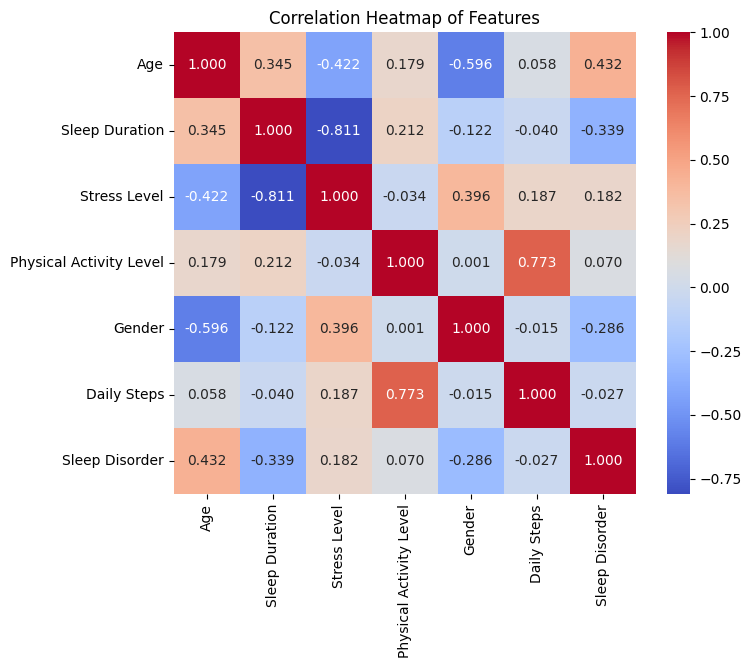

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = data[['Age', 'Sleep Duration', 'Stress Level', 'Physical Activity Level','Gender', 'Daily Steps', 'Sleep Disorder']]
correlation_matrix = selected_features.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


numerical_columns = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Sleep Disorder'])
y = data['Sleep Disorder']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")


Training set size: 261 rows
Test set size: 113 rows


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


y_pred_lr = log_reg.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_log)
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9380530973451328
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.98      0.88      0.93        51

    accuracy                           0.94       113
   macro avg       0.94      0.93      0.94       113
weighted avg       0.94      0.94      0.94       113



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


y_pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9557522123893806
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.98      0.92      0.95        51

    accuracy                           0.96       113
   macro avg       0.96      0.95      0.96       113
weighted avg       0.96      0.96      0.96       113



In [ ]:

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3590 - loss: 1.1690 - val_accuracy: 0.4151 - val_loss: 0.8867
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3386 - loss: 0.8500 - val_accuracy: 0.3208 - val_loss: 0.7883
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4383 - loss: 0.7301 - val_accuracy: 0.4906 - val_loss: 0.7109
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5754 - loss: 0.6718 - val_accuracy: 0.4906 - val_loss: 0.7198
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5676 - loss: 0.6592 - val_accuracy: 0.7736 - val_loss: 0.5836
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7019 - loss: 0.5676 - val_accuracy: 0.8113 - val_loss: 0.5144
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8112 - loss: 0.5005 - val_accuracy: 0.8868 - val_loss: 0.4320
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8489 - loss: 0.4563 - val_accuracy: 0.6981 - val_loss: 0.4997
Epoch 

In [ ]:

_, accuracy_nn = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", accuracy_nn)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9548 - loss: 0.1965 
Neural Network Accuracy: 0.9469026327133179


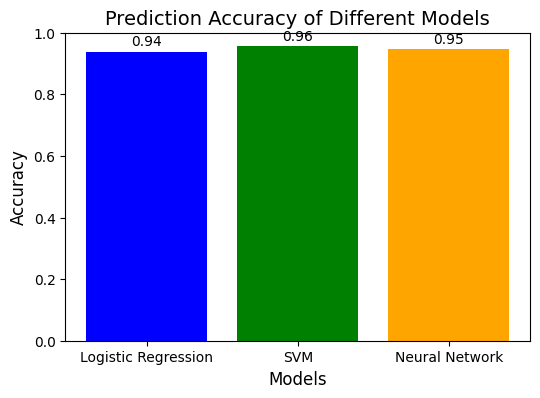

In [ ]:
import matplotlib.pyplot as plt
model_names = ['Logistic Regression', 'SVM', 'Neural Network']
accuracies = [acc_log, acc_svm, accuracy_nn]

plt.figure(figsize=(6, 4))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])


plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Prediction Accuracy of Different Models', fontsize=14)
plt.ylim(0, 1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10)


plt.show()

In [ ]:
y_pred_nn = (model.predict(X_test) > 0.5).astype("int")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
from sklearn.metrics import precision_score, recall_score


In [ ]:

precision_logistic = precision_score(y_test, y_pred_lr, pos_label=1)
recall_logistic = recall_score(y_test, y_pred_lr, pos_label=1)


precision_svm = precision_score(y_test, y_pred_svm, pos_label=1)
recall_svm = recall_score(y_test, y_pred_svm, pos_label=1)


precision_nn = precision_score(y_test, y_pred_nn, pos_label=1)
recall_nn = recall_score(y_test, y_pred_nn, pos_label=1)


In [ ]:

results = {
    "Model": ["Logistic Regression", "SVM", "Neural Network"],
    "Precision": [precision_logistic, precision_svm, precision_nn],
    "Recall": [recall_logistic, recall_svm, recall_nn],
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Precision    Recall
0  Logistic Regression   0.978261  0.882353
1                  SVM   0.979167  0.921569
2       Neural Network   0.959184  0.921569


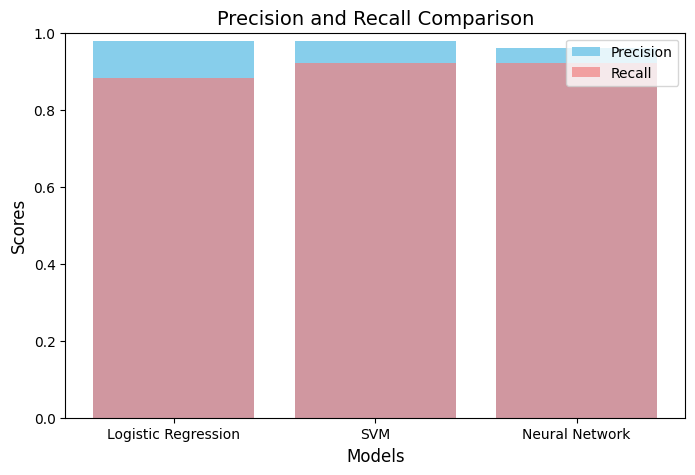

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
plt.bar(results["Model"], results["Precision"], color='skyblue', label='Precision')
plt.bar(results["Model"], results["Recall"], color='lightcoral', label='Recall', alpha=0.7)

plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Precision and Recall Comparison', fontsize=14)
plt.legend()
plt.ylim(0, 1)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


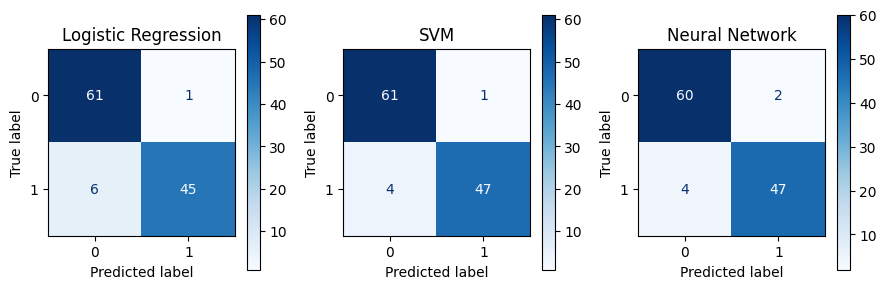

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(9, 3))


cm_logistic = confusion_matrix(y_test, y_pred_lr)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
disp_logistic.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')


cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(ax=axes[1], cmap='Blues')
axes[1].set_title('SVM')


cm_nn = confusion_matrix(y_test, y_pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp_nn.plot(ax=axes[2], cmap='Blues')
axes[2].set_title('Neural Network')


plt.tight_layout()
plt.show()
